### let's look at some of the (hopefully) pretty molecules we generate!

In [8]:
from rdkit import Chem
import pickle

from ipywidgets import interact, fixed, IntSlider
import ipywidgets
import py3Dmol

def show_mol(mol, view, grid):
    mb = Chem.MolToMolBlock(mol)
    view.removeAllModels(viewer=grid)
    view.addModel(mb,'sdf', viewer=grid)
    view.setStyle({'model':0},{'stick': {}}, viewer=grid)
    view.zoomTo(viewer=grid)
    return view

def view_single(mol):
    view = py3Dmol.view(width=600, height=600, linked=False, viewergrid=(1,1))
    show_mol(mol, view, grid=(0, 0))
    return view

def MolTo3DView(mol, size=(600, 600), style="stick", surface=False, opacity=0.5, confId=0):
    """Draw molecule in 3D
    
    Args:
    ----
        mol: rdMol, molecule to show
        size: tuple(int, int), canvas size
        style: str, type of drawing molecule
               style can be 'line', 'stick', 'sphere', 'carton'
        surface, bool, display SAS
        opacity, float, opacity of surface, range 0.0-1.0
    Return:
    ----
        viewer: py3Dmol.view, a class for constructing embedded 3Dmol.js views in ipython notebooks.
    """
    assert style in ('line', 'stick', 'sphere', 'carton')
    mol[confId] = Chem.RemoveHs(mol[confId])
    mblock = Chem.MolToMolBlock(mol[confId])
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

def conf_viewer(idx, mol):
    return MolTo3DView(mol, confId=idx).show()

In [6]:
with open('test_run/test_mols.pkl', 'rb') as f:
    test_mols = pickle.load(f)
smiles = list(test_mols.keys())

O=C[C@@H]1C[C@@]12OC[C@@H]2O


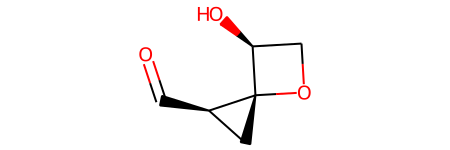

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [16]:
test_idx = 850



smi = smiles[test_idx]
print(smi)

mol_graph = Chem.MolFromSmiles(smi)
display(mol_graph)

mols = test_mols[smi]
MolTo3DView(mols)
#interact(conf_viewer, idx=ipywidgets.IntSlider(min=0, max=len(mols)-1, step=1), mol=fixed(mols));